# 4. Flow on a circle

## Preamble

In [2]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import quad
from scipy.interpolate import InterpolatedUnivariateSpline as interpolate
from scipy.optimize import root
from scipy.misc import derivative

import sympy as sp
import fractions as fra

from ipywidgets import interact

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
%run -i "rcParameters.py"
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["font.family"]='Times New Roman'
plt.rcParams["mathtext.fontset"]='stix';

In [4]:
# set fontsize in markdown cells
from IPython.core.display import display, HTML, Latex
display(HTML("<style>.rendered_html { font-size: 16px; }</style>"))

## Utility functions

In [5]:
# find fixed poits FP and their stability sFP
# input: function f(x;r) ; initial guess for FPs; parameter r
# output: [Sfp=stable FPs, Ufp=unstable FPs]
def fP(f,fP0,r,eps=1e-6):
    sol=root(f,fP0,args=(r,))
    Sfp = []; Ufp = []
    if sol.success:
        for x in sol.x:
            xp = derivative(f,x,dx=eps,args=(r,))
            if xp < 0:
                Sfp = np.append(Sfp,x)
            else:
                Ufp = np.append(Ufp,x)
    return [Sfp,Ufp]

In [6]:
# Phase portrait:  interact plot f(x;r) 
def int_fxr(f,dx,dr,dy,eps=1e-6,nx=100,col='r',ms=10,title='',x_lab=r'$\theta$',y_lab=r'$\dot{\theta}$'):
    x = np.linspace(dx[0],dx[1],nx)
    f_ = lambda x,r: interpolate(x,f(x,r))
    @interact(r=(dr[0],dr[1],dr[2]),grid=True)
    def update(r=dr[0],grid=True):
        # plot f(x;r) vs x
        fig, ax = plt.subplots(figsize=(8,5))
        ax.plot(x,f(x,r),c=col,ls='-',lw=3)
        ax.set_ylim(dy)
        ax.set_xlim(dx)
        ax.set_xlabel(x_lab)
        ax.set_ylabel(y_lab)
        ax.axhline(0,dx[0],dx[-1],c='k',lw=1)
        ax.grid(grid)
        # determine the fixed points x*
        FP = f_(x,r).roots()
        # plot x* if exist
        for x0 in FP:
            sFP=derivative(f,x0,dx=eps,args=(r,))
            if sFP < 0: # stable PF
                ax.plot(x0,0,'o',mfc=col,mec=col,ms=ms)
            else:
                ax.plot(x0,0,'o',mfc='w',mec=col,ms=ms)

        ax.set_title(title,color='b')
        plt.show()        

In [7]:
# Bifurcation diagram: x vs r
def BF_diag(f,x1,x2,r1,r2,nx=80,nr=80,title='',x_lab='$r$',y_lab='$x^\star$'):
    fx = lambda x,r: derivative(f,x,dx=1e-6,args=(r,))
    x=np.linspace(x1,x2,nx)
    r=np.linspace(r1,r2,nr)
    R,X = np.meshgrid(r,x)
    Z = f(X,R)
    Zx= fx(X,R)
    Zu= np.ma.masked_where(Zx<0,Z)
    Zs= np.ma.masked_where(Zx>0,Z)
    fig, ax=plt.subplots(figsize=(8,5))
    cnt_S=ax.contour(R,X,Zs,levels=[0],colors='k',linewidths=3)
    cnt_U=ax.contour(R,X,Zu,levels=[0],colors='k',linewidths=3,linestyles='dashed')
    ax.grid()
    ax.set_xlabel(x_lab)
    ax.set_ylabel(y_lab)
    ax.set_title(title,color='b')
    plt.show()

In [8]:
# interactive Streamline plot: x(t;r)
def int_xtr(f,t_max,dx,dr,FP0,Ng=40,dens=[0.5,1],title='',y_lab=r'$\theta$'):
    t = np.linspace(0,t_max,Ng)
    x = np.linspace(dx[0],dx[1],Ng)
    X,Y = np.meshgrid(t,x)
    @interact(r=(dr[0],dr[1],dr[2]),grid=False)
    def update(r=dr[0],grid=False):
        [Sx0,Ux0]=fP(f,FP0,r)
        # plot the slope field 
        fig, ax0=plt.subplots(figsize=(8,5))
        ax0.streamplot(X,Y, 1+0*X,f(Y,r),density=dens,
                      linewidth=1,color='k',arrowstyle='->')

        for x0 in Sx0:
            ax0.hlines(x0,0,t_max,colors='r',ls='-',lw=2)
        for x0 in Ux0:
            ax0.hlines(x0,0,t_max,colors='b',ls='--',lw=2)

        ax0.grid(grid)  
        ax0.set_xlim(0,t_max)
        ax0.set_ylim(dx)
        ax0.set_xlabel('$t$')
        ax0.set_ylabel(y_lab)
        ax0.set_title(title,color='b')
        plt.show()

In [9]:
# set minor tick marks on/off; default on
def m_tick_on():
    plt.rcParams['xtick.minor.visible'] = True
    plt.rcParams['ytick.minor.visible'] = True
def m_tick_off():
    plt.rcParams['xtick.minor.visible'] = False
    plt.rcParams['ytick.minor.visible'] = False
    
m_tick_on()

## 4.3 Nonuniform Oscillator

In [10]:
# phase portrait ()
f_nuo = lambda x,w,a: w-a*np.sin(x)
f_ = lambda x,r: f_nuo(x,1,r)
int_fxr(f_,[-np.pi,np.pi],[-2,2,0.25],[-2,4],title=r'$f(\theta)=1-r\,\sin\theta$;  $r=a/\omega$')

interactive(children=(FloatSlider(value=-2.0, description='r', max=2.0, min=-2.0, step=0.25), Checkbox(value=T…

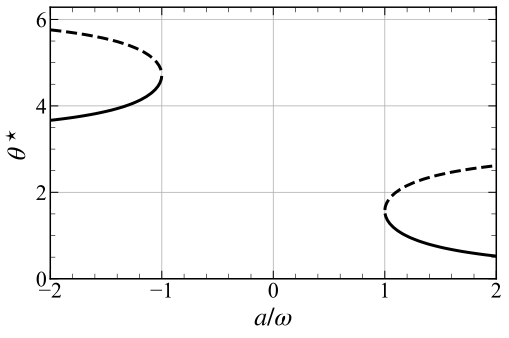

In [11]:
# Bifurcation diagram x* vs a/w
BF_diag(f_,0,2*np.pi,-2,2,x_lab='$a/\omega$',y_lab=r'$\theta^\star$')

In [12]:
# x(t;x0) as streamplot
int_xtr(f_,20,[0,2*np.pi],[-2,2,0.2],[1.,3.,5.],title=r'$\dot\theta=1-r\,\sin\theta$')

interactive(children=(FloatSlider(value=-2.0, description='r', max=2.0, min=-2.0, step=0.2), Checkbox(value=Fa…

For $a>\omega$ there is a stable fixed point at $\theta^\star = \arcsin(\omega/a)$, and an ustable fixed point at $\pi-\theta^\star$

For $|a|<\omega$ the dynamics is periodic with period $ T=\int_0^{ 2\pi } d\theta/(\omega-a\sin\theta) = 2\pi/\sqrt{ \omega^2 - a^2 }$

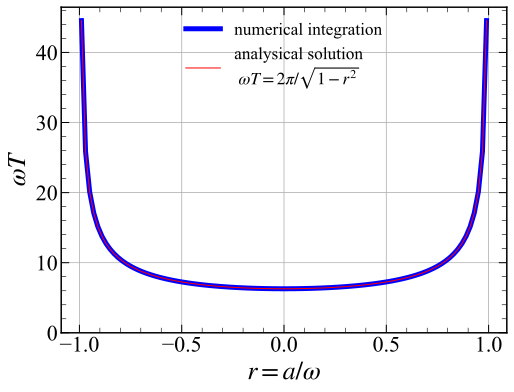

In [13]:
# Calculate and plot the period for |a| < w
T_ = lambda r: quad(lambda x,r: 1/(1-r*np.sin(x)),-np.pi,np.pi,args=(r,))[0]
vT_= np.vectorize(T_)
# analytical solution for T
T_th = lambda r: 2*np.pi/np.sqrt(1-r**2)

r_ = np.linspace(-0.99,0.99,100)
fig_T, ax = plt.subplots()
ax.plot(r_,vT_(r_),'b-',lw=5, label='numerical integration')
ax.plot(r_,T_th(r_),'r-',lw=1,label='analysical solution\n $\omega T=2\pi/\sqrt{1-r^2} $')
ax.grid()
ax.legend()
ax.set_xlabel('$r=a/\omega$')
ax.set_ylabel('$\omega T$')
ax.set_ylim(0,)
plt.show()

### Ghosts and Bottlenecks $\rightarrow$ square root scaling law

$T=\int_0^{2\pi} d\theta/(\omega - a\sin\theta)=(2\pi i/\omega)\sum_{|z_j|<1} \mathrm{res}[f(z,r),z_j]$, 
where $f(z,r)=-iz^{-1}/[1-r(z-z^{-1})/2i]$

In [14]:
# Calculate period using theory of residues
z = sp.symbols('z',complex=True)
r,a,b = sp.symbols('r a b',real=True)

# define complex function integrand 
fz = lambda z,r: (-sp.I/z/(1-r*(z-1/z)/2/sp.I)).simplify()
print('f(z,r) ='); display(fz(z,r))
[z1,z2]=sp.solve(1/fz(z,r),z)
print('poles z1 and z2 of f(z,r):'); display(z1,z2)
res_z1 = sp.residue(fz(z,r),z,z1)
print('residues of f(z,r) for pole z1 inside unit circle:'); display(res_z1)
# calculate wT = T/(1/w)
wT = (2*sp.pi*sp.I*res_z1).simplify()
print('period T in units of w '); display(wT)
print('In the original units, the period is')
display(Latex('$T=2\pi/\sqrt{\omega^2 - a^2}$'))

f(z,r) =


-2*I/(I*r*(z**2 - 1) + 2*z)

poles z1 and z2 of f(z,r):


I*(1 - sqrt(1 - r**2))/r

I*(sqrt(1 - r**2) + 1)/r

residues of f(z,r) for pole z1 inside unit circle:


-I/sqrt(1 - r**2)

period T in units of w 


2*pi/sqrt(1 - r**2)

In the original units, the period is


<IPython.core.display.Latex object>

Assuming $\omega=a(1+\epsilon)$, with $\epsilon\ll 1$, i.e., $r=a/\omega\approx 1-\epsilon$, one can expand the period $T=2\pi/\omega\sqrt{1-r^2}$ about $r=1-\epsilon$, and retain the dominant leading order term in $1/\epsilon$

In [15]:
# expand wT about the "bottleneck" r=1-0 and keep leading term only
epsilon = sp.symbols('epsilon',positive=True)
wT.subs(r,1-z).series(z,0,0).removeO().subs(z,epsilon)

sqrt(2)*pi/sqrt(epsilon)

Estimate time to pass the ___bottleneck region in the vicinity of a saddle node bifurcation___, i.e., $f(x)=r+x^2$ for $0<r\ll 1$ 

In [16]:
2*sp.pi*sp.I*sp.residue(1/(r+z**2),z,sp.I*sp.sqrt(r))

pi/sqrt(r)

## 4.4 Overdamped Pendulum

## 4.5 Fireflies

## 4.6 Superconducting Josephson Junctions

In [21]:
# phase portrait ()
f_nuo = lambda x,a: 10-a*np.sin(x)
f_ = lambda x,r: f_nuo(x,r)
int_fxr(f_,[-np.pi,np.pi],[1,10,0.25],[-2,4],title=r'$f(\theta)=1-r\,\sin\theta$;  $r=a/\omega$')

interactive(children=(FloatSlider(value=1.0, description='r', max=10.0, min=1.0, step=0.25), Checkbox(value=Tr…